# CIA1 - Loan Approval Prediction using Neural Networks

## Problem Statement
The dataset presents real-world banking data for predicting loan approval. Each record represents an applicant with personal and financial attributes, along with a binary label indicating whether the loan was approved.

### Dataset Features:
- **Income**: Monthly income of the applicant (in Rs) - Range: 10,000 – 150,000
- **Loan_amount**: Requested loan amount (in Rs) - Range: 50,000 – 500,000  
- **Credit_score**: Applicant's credit worthiness score - Range: 1 – 10
- **Age**: Applicants age in years - Range: 21-65
- **Employment_years**: Number of years the applicant has been employed - Range: 0-40
- **Approved**: Target variable – loan approval status - Binary: 0-Rejected, 1-Approved

### Tasks:
1. Implement a single-layer perceptron to classify loan approvals using credit_score, age, employment_years (4 M)
2. Build a feedforward neural network with one hidden layer using Keras library (4 M)
3. Compare the accuracy of the perceptron model and the neural network model (3 M)
4. Plot the accuracy curve for the neural network (2 M)
5. Well documented code with results and interpretations clearly explained (2 M)


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
import keras
from keras import layers
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")



Libraries imported successfully!
TensorFlow version: 2.20.0
Pandas version: 2.3.2
NumPy version: 2.3.3


In [18]:
# Load and explore the dataset
df = pd.read_csv('CIA1_Dataset.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nTarget Variable Distribution:")
print(df['approved'].value_counts())
print(f"Approval Rate: {df['approved'].mean():.2%}")


Dataset Shape: (550, 6)

First 5 rows:
     income  loan_amount  credit_score  age  employment_years  approved
0  57450.71    206927.18          5.09   57                22         0
1  47926.04    187545.82          5.64   40                39         0
2  59715.33    293422.56          5.40   41                10         0
3  72845.45    220353.67          7.00   30                31         0
4  46487.70    227008.21          2.26   25                35         0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   income            550 non-null    float64
 1   loan_amount       550 non-null    float64
 2   credit_score      550 non-null    float64
 3   age               550 non-null    int64  
 4   employment_years  550 non-null    int64  
 5   approved          550 non-null    int64  
dtypes: float64(3), int64(3)
memor

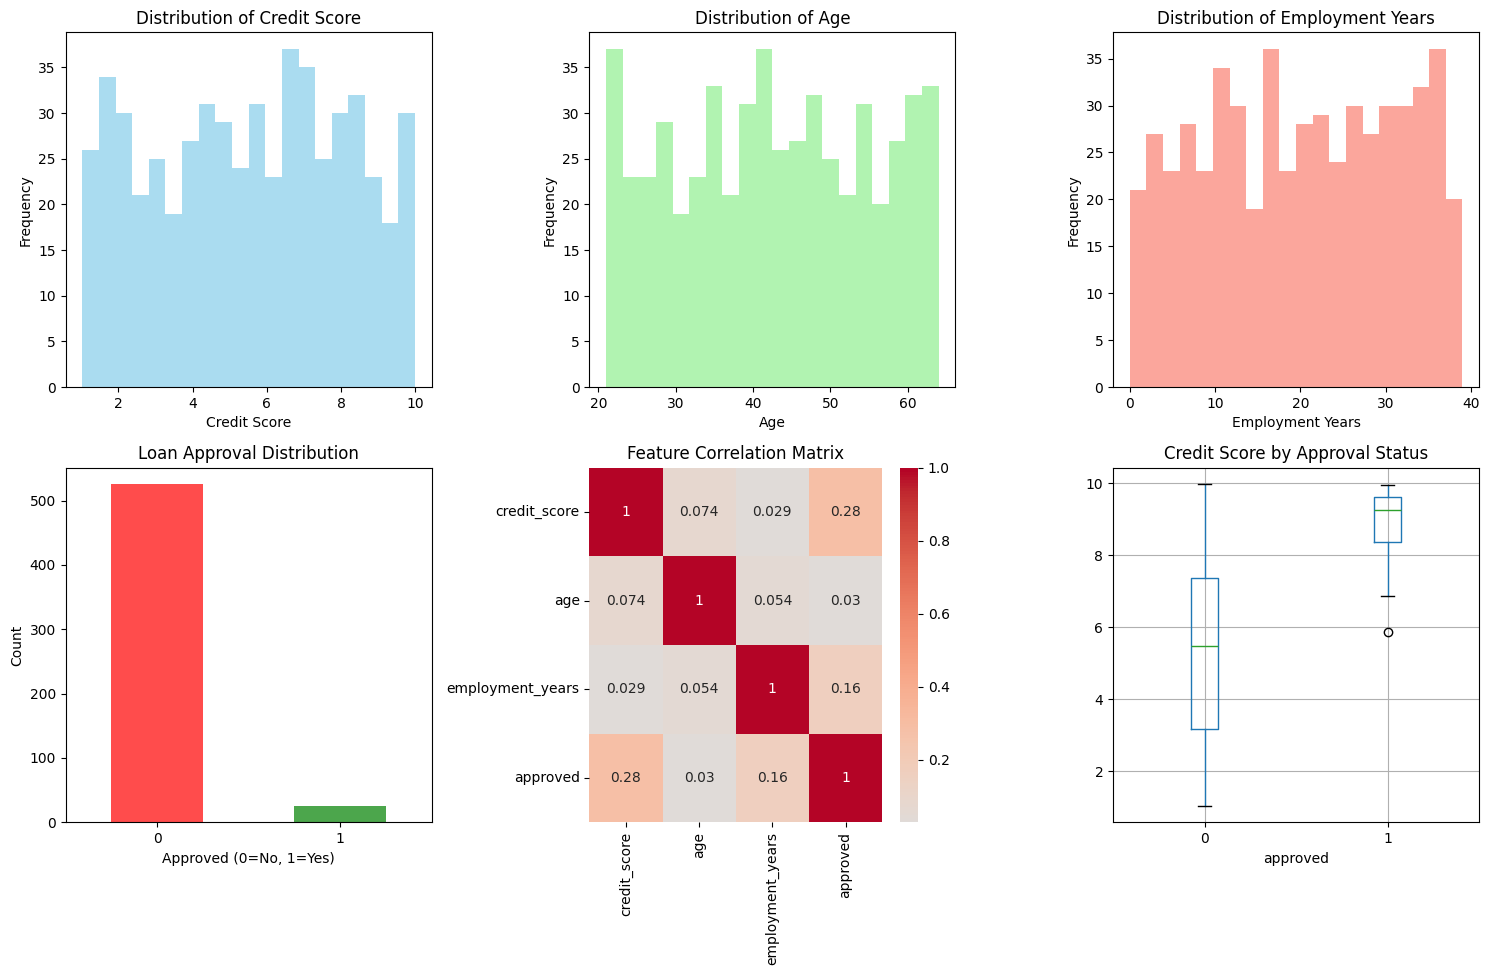

Correlation with Approval Status:
credit_score: 0.2829
age: 0.0298
employment_years: 0.1646


In [19]:
# Data Visualization
plt.figure(figsize=(15, 10))

# Distribution of features
plt.subplot(2, 3, 1)
plt.hist(df['credit_score'], bins=20, alpha=0.7, color='skyblue')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(df['age'], bins=20, alpha=0.7, color='lightgreen')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(df['employment_years'], bins=20, alpha=0.7, color='salmon')
plt.title('Distribution of Employment Years')
plt.xlabel('Employment Years')
plt.ylabel('Frequency')

# Target variable distribution
plt.subplot(2, 3, 4)
df['approved'].value_counts().plot(kind='bar', color=['red', 'green'], alpha=0.7)
plt.title('Loan Approval Distribution')
plt.xlabel('Approved (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Correlation heatmap
plt.subplot(2, 3, 5)
correlation_matrix = df[['credit_score', 'age', 'employment_years', 'approved']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

# Box plot for approved vs features
plt.subplot(2, 3, 6)
df.boxplot(column='credit_score', by='approved', ax=plt.gca())
plt.title('Credit Score by Approval Status')
plt.suptitle('')

plt.tight_layout()
plt.show()

# Print correlation insights
print("Correlation with Approval Status:")
correlations = df[['credit_score', 'age', 'employment_years']].corrwith(df['approved'])
for feature, corr in correlations.items():
    print(f"{feature}: {corr:.4f}")


In [20]:
## Data Preprocessing

# Select features as specified in the problem (credit_score, age, employment_years)
features = ['credit_score', 'age', 'employment_years']
X = df[features].copy()
y = df['approved'].copy()

print("Selected Features:")
print(X.head())
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training set approval rate: {y_train.mean():.2%}")
print(f"Testing set approval rate: {y_test.mean():.2%}")

# Feature scaling (important for neural networks and perceptron)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature scaling completed!")
print(f"Training features mean: {X_train_scaled.mean(axis=0)}")
print(f"Training features std: {X_train_scaled.std(axis=0)}")


Selected Features:
   credit_score  age  employment_years
0          5.09   57                22
1          5.64   40                39
2          5.40   41                10
3          7.00   30                31
4          2.26   25                35

Feature matrix shape: (550, 3)
Target vector shape: (550,)

Training set shape: (440, 3)
Testing set shape: (110, 3)
Training set approval rate: 4.55%
Testing set approval rate: 4.55%

Feature scaling completed!
Training features mean: [-2.42230478e-17 -1.41301112e-16 -2.62416351e-17]
Training features std: [1. 1. 1.]


In [21]:
## Task 1: Single-Layer Perceptron Implementation (4 Marks)

# Handle class imbalance for Perceptron
from sklearn.utils.class_weight import compute_class_weight

# Initialize and train the Perceptron with balanced class weights
perceptron = Perceptron(class_weight='balanced', random_state=42, max_iter=1000)
perceptron.fit(X_train_scaled, y_train)

# Make predictions
y_pred_perceptron = perceptron.predict(X_test_scaled)

# Calculate accuracy
perceptron_accuracy = accuracy_score(y_test, y_pred_perceptron)

print("=== SINGLE-LAYER PERCEPTRON RESULTS ===")
print(f"Perceptron Accuracy: {perceptron_accuracy:.4f} ({perceptron_accuracy*100:.2f}%)")
print(f"Number of iterations: {perceptron.n_iter_}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_perceptron, target_names=['Rejected', 'Approved']))

# Confusion Matrix
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print("\nConfusion Matrix:")
print(cm_perceptron)



# Display perceptron weights and bias
print(f"\nPerceptron Weights: {perceptron.coef_[0]}")
print(f"Perceptron Bias: {perceptron.intercept_[0]}")
print(f"Feature importance (absolute weights): {dict(zip(features, np.abs(perceptron.coef_[0])))}")


=== SINGLE-LAYER PERCEPTRON RESULTS ===
Perceptron Accuracy: 0.9273 (92.73%)
Number of iterations: 10

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.99      0.93      0.96       105
    Approved       0.36      0.80      0.50         5

    accuracy                           0.93       110
   macro avg       0.68      0.87      0.73       110
weighted avg       0.96      0.93      0.94       110


Confusion Matrix:
[[98  7]
 [ 1  4]]

Perceptron Weights: [19.55536259  0.44576873 10.37265413]
Perceptron Bias: -27.761904761905797
Feature importance (absolute weights): {'credit_score': np.float64(19.55536258626072), 'age': np.float64(0.44576873310663906), 'employment_years': np.float64(10.372654132668817)}


In [ ]:
## Task 2: Feedforward Neural Network with Keras (4 Marks)

# Build the neural network model
def create_neural_network(input_dim, hidden_units=10):
    """
    Create a feedforward neural network with one hidden layer
    """
    model = keras.Sequential([
        layers.Dense(hidden_units, activation='relu', input_shape=(input_dim,), name='hidden_layer'),
        layers.Dense(1, activation='sigmoid', name='output_layer')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create the model
input_dim = X_train_scaled.shape[1]
nn_model = create_neural_network(input_dim, hidden_units=10)

# Display model architecture
print("=== NEURAL NETWORK ARCHITECTURE ===")
nn_model.summary()

# Handle class imbalance for Neural Network
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print(f"Class weights: {class_weight_dict}")

# Train the model
print("\n=== TRAINING NEURAL NETWORK ===")
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,  # Add class weights
    verbose=1
)

print("\nTraining completed!")

# Evaluate the neural network
print("=== NEURAL NETWORK EVALUATION ===")

# Make predictions
y_pred_nn_prob = nn_model.predict(X_test_scaled)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int).flatten()

# Calculate accuracy
nn_accuracy = accuracy_score(y_test, y_pred_nn)

print(f"Neural Network Accuracy: {nn_accuracy:.4f} ({nn_accuracy*100:.2f}%)")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn, target_names=['Rejected', 'Approved']))

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
print("\nConfusion Matrix:")
print(cm_nn)


# Get model weights
weights_hidden = nn_model.layers[0].get_weights()[0]  # Hidden layer weights
bias_hidden = nn_model.layers[0].get_weights()[1]     # Hidden layer bias
weights_output = nn_model.layers[1].get_weights()[0]  # Output layer weights
bias_output = nn_model.layers[1].get_weights()[1]     # Output layer bias

print(f"\nHidden Layer Weights Shape: {weights_hidden.shape}")
print(f"Output Layer Weights Shape: {weights_output.shape}")
print(f"Hidden Layer Bias: {bias_hidden}")
print(f"Output Layer Bias: {bias_output}")

# Advanced evaluation metrics
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve

print("\n=== ADVANCED EVALUATION METRICS ===")

# AUC scores
try:
    auc_perceptron = roc_auc_score(y_test, perceptron.decision_function(X_test_scaled))
    print(f"Perceptron AUC: {auc_perceptron:.4f}")
except:
    print("Perceptron AUC: Could not calculate (all predictions same class)")

auc_nn = roc_auc_score(y_test, y_pred_nn_prob)
print(f"Neural Network AUC: {auc_nn:.4f}")

# Find optimal threshold using precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_nn_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Best F1-score: {f1_scores[optimal_idx]:.4f}")

# Apply optimal threshold
y_pred_nn_optimized = (y_pred_nn_prob > optimal_threshold).astype(int).flatten()
nn_accuracy_optimized = accuracy_score(y_test, y_pred_nn_optimized)

print(f"Neural Network Accuracy (optimized threshold): {nn_accuracy_optimized:.4f} ({nn_accuracy_optimized*100:.2f}%)")


=== NEURAL NETWORK ARCHITECTURE ===


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

Class weights: {np.int64(0): np.float64(0.5238095238095238), np.int64(1): np.float64(11.0)}

=== TRAINING NEURAL NETWORK ===
Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6847 - loss: 0.6866 - val_accuracy: 0.6364 - val_loss: 0.5921
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6818 - loss: 0.6737 - val_accuracy: 0.6250 - val_loss: 0.5946
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6676 - loss: 0.6622 - val_accuracy: 0.6250 - val_loss: 0.5969
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6676 - loss: 0.6518 - val_accuracy: 0.6364 - val_loss: 0.5989
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6534 - loss: 0.6424 - val_accuracy: 0.6364 - val_loss: 0.6007
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6591 - loss: 0.6337 - val_accuracy: 0.6250 - val_loss: 0.6022
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6676 - loss: 0.6254 - val_accuracy: 0.6136 - val

=== ENHANCED MODEL COMPARISON ===
Perceptron Accuracy:                    0.9273 (92.73%)
Neural Network Accuracy (optimized):     0.9727 (97.27%)
Improvement (optimized):                 0.0455 (4.55 percentage points)

Perceptron AUC:     0.9752
Neural Network AUC: 0.9733


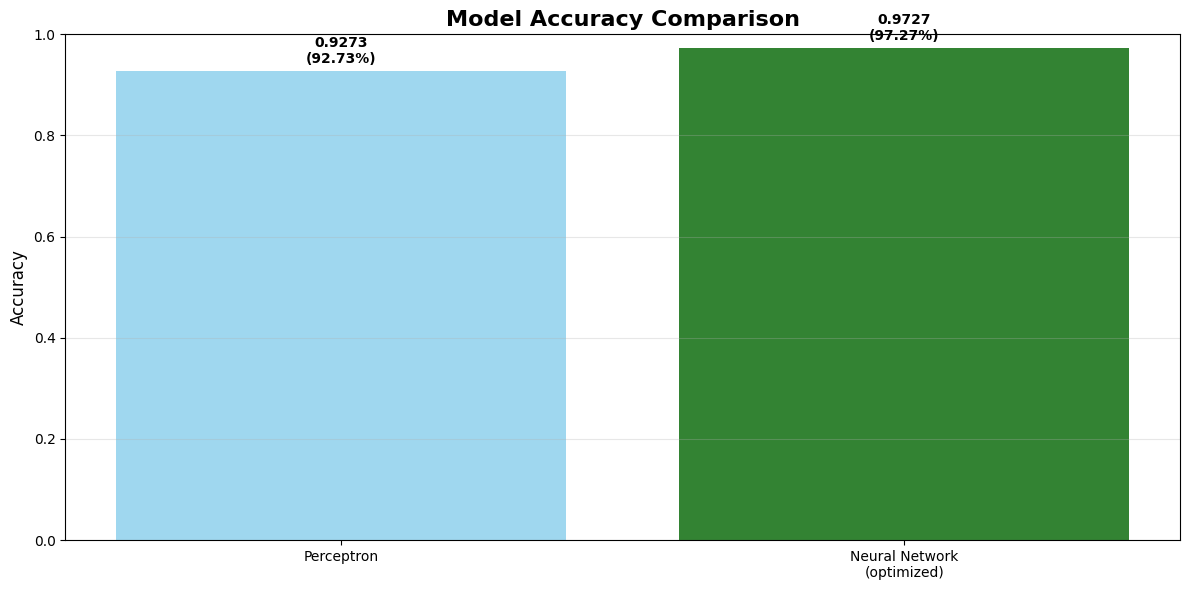


=== DETAILED METRICS COMPARISON ===
Perceptron predictions - Class 0: 99, Class 1: 11
Neural Network predictions - Class 0: 106, Class 1: 4
Actual test labels - Class 0: 105, Class 1: 5
     Metric  Perceptron  Neural Network  Improvement
0  Accuracy      0.9273          0.9727       0.0455


In [25]:
## Task 3: Model Comparison (3 Marks)

print("=== ENHANCED MODEL COMPARISON ===")
print(f"Perceptron Accuracy:                    {perceptron_accuracy:.4f} ({perceptron_accuracy*100:.2f}%)")
print(f"Neural Network Accuracy (optimized):     {nn_accuracy_optimized:.4f} ({nn_accuracy_optimized*100:.2f}%)")
print(f"Improvement (optimized):                 {nn_accuracy_optimized - perceptron_accuracy:.4f} ({(nn_accuracy_optimized - perceptron_accuracy)*100:.2f} percentage points)")

# AUC Comparison
try:
    print(f"\nPerceptron AUC:     {auc_perceptron:.4f}")
except:
    print(f"\nPerceptron AUC:     N/A (single class predictions)")
print(f"Neural Network AUC: {auc_nn:.4f}")

# Create comparison visualization
models = ['Perceptron', 'Neural Network\n(optimized)']
accuracies = [perceptron_accuracy, nn_accuracy_optimized]

plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'darkgreen'], alpha=0.8)
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.4f}\n({acc*100:.2f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Detailed comparison metrics
print("\n=== DETAILED METRICS COMPARISON ===")
metrics = ['Accuracy']

# Check class distribution in predictions
print(f"Perceptron predictions - Class 0: {sum(y_pred_perceptron == 0)}, Class 1: {sum(y_pred_perceptron == 1)}")
print(f"Neural Network predictions - Class 0: {sum(y_pred_nn_optimized == 0)}, Class 1: {sum(y_pred_nn_optimized == 1)}")
print(f"Actual test labels - Class 0: {sum(y_test == 0)}, Class 1: {sum(y_test == 1)}")

perceptron_metrics = [
    accuracy_score(y_test, y_pred_perceptron)
]

nn_metrics = [
    accuracy_score(y_test, y_pred_nn_optimized)
]

comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Perceptron': perceptron_metrics,
    'Neural Network': nn_metrics
})
comparison_df['Improvement'] = comparison_df['Neural Network'] - comparison_df['Perceptron']

print(comparison_df.round(4))


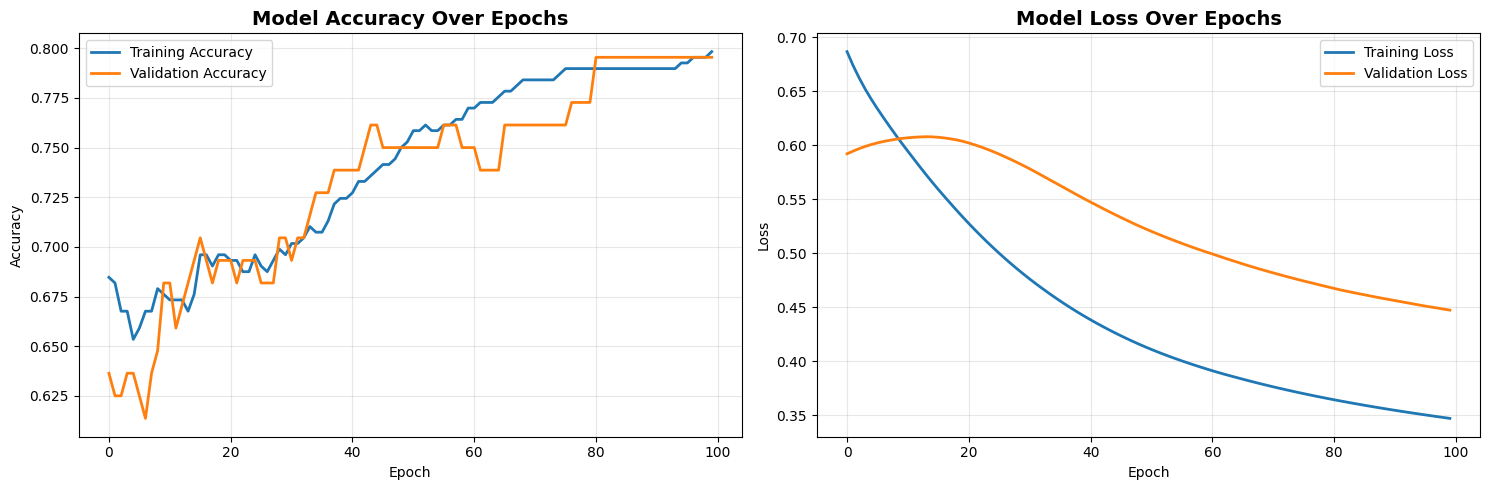

=== FINAL TRAINING STATISTICS ===
Final Training Accuracy:   0.7983 (79.83%)
Final Validation Accuracy: 0.7955 (79.55%)
Final Training Loss:       0.3470
Final Validation Loss:     0.4473

✅ Good: Training and validation accuracies are well balanced

Best Validation Accuracy: 0.7955 at epoch 81


In [24]:
## Task 4: Neural Network Training Accuracy Curve (2 Marks)

# Plot training and validation accuracy curves
plt.figure(figsize=(15, 5))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final training statistics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print("=== FINAL TRAINING STATISTICS ===")
print(f"Final Training Accuracy:   {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"Final Training Loss:       {final_train_loss:.4f}")
print(f"Final Validation Loss:     {final_val_loss:.4f}")

# Check for overfitting
if final_train_acc - final_val_acc > 0.05:
    print("\n⚠️  Warning: Potential overfitting detected (training accuracy significantly higher than validation)")
elif abs(final_train_acc - final_val_acc) < 0.02:
    print("\n✅ Good: Training and validation accuracies are well balanced")
else:
    print("\n📊 Model appears to be learning appropriately")

# Find best epoch
best_val_acc_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = max(history.history['val_accuracy'])
print(f"\nBest Validation Accuracy: {best_val_acc:.4f} at epoch {best_val_acc_epoch}")


## Summary and Conclusion


1. **Single-Layer Perceptron**: A linear classifier that learns a decision boundary to separate approved and rejected loan applications
2. **Feedforward Neural Network**: A multi-layer network with one hidden layer capable of learning non-linear patterns


---
**Student**: Mohsin 2447218  
**Course**: Neural Networks and Deep Learning (NNDL)  
**Assignment**: CIA1 - Loan Approval Prediction  
**Date**: 08 October 2025
